In [40]:
#Image filtering and correction
print("AMINA SMAGULOVA_Machine Vision")


AMINA SMAGULOVA_Machine Vision


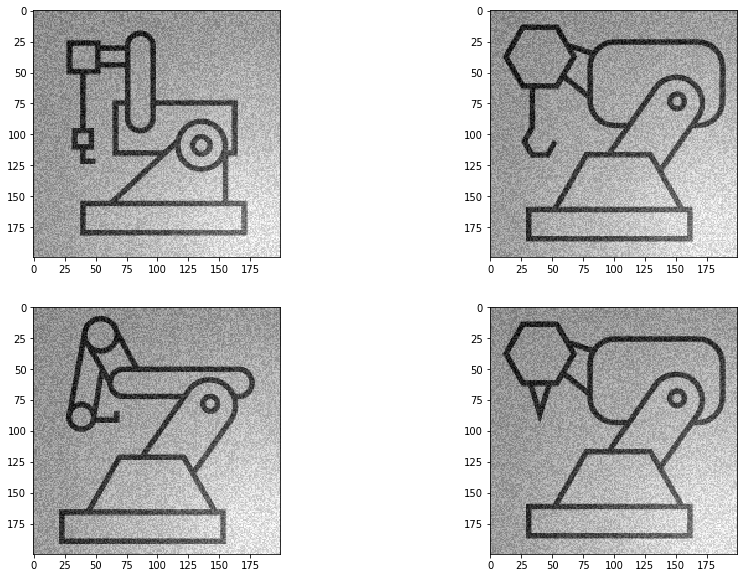

In [41]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from scipy import ndimage
from PIL import Image


# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline
import matplotlib.image as img



import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
im1 = img.imread('./1000-Copy1.png')
im2= img.imread('./1001-Copy1.png')
im3 = img.imread('./1002-Copy1.png')
im4 = img.imread('./1003-Copy1.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(im1,cmap='gray')
plt.subplot(222)
plt.imshow(im2,cmap='gray')
plt.subplot(223)
plt.imshow(im3,cmap='gray')
plt.subplot(224)
plt.imshow(im4,cmap='gray')



In [7]:
image_size = 50 # Pixel width and height.
size = image_size,image_size
pixel_depth = 255.0 # Number of levels per pixel.
sizes = [784,622,222,473]
folders = [
    r'data2//Arms//',
    r'data2//Figure_normal_legs//',
    r'data2//FigureWheels//',
    r'data2//Head//',
]

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      img = Image.open(image_file)
      newImg = img.resize(size, Image.ANTIALIAS)
      image_data = (np.array(newImg).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
print(X_datasets)
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_letter(folder, sizes[idx]))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)
    

[]
data2//Arms//
Could not read: data2//Arms//.ipynb_checkpoints : [Errno 21] Is a directory: 'data2//Arms//.ipynb_checkpoints' - it's ok, skipping.
Full dataset tensor: (784, 50, 50)
Mean: 0.112748
Standard deviation: 0.15943
data2//Figure_normal_legs//
Full dataset tensor: (622, 50, 50)
Mean: 0.0886578
Standard deviation: 0.17902
data2//FigureWheels//
Full dataset tensor: (222, 50, 50)
Mean: 0.0753042
Standard deviation: 0.184759
data2//Head//
Full dataset tensor: (473, 50, 50)
Mean: 0.0373346
Standard deviation: 0.210811


Total samples number: (2101, 50, 50)
Samples for tests: 526
Samples for trains: 1575


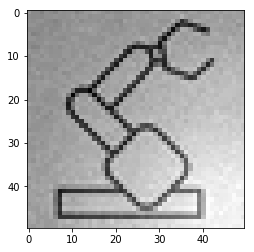

In [9]:
from sklearn.model_selection import train_test_split

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
print("Total samples number:",X_datasets2.shape)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
print("Samples for tests:",Y_tests.shape[0])
print("Samples for trains:",Y_trains.shape[0])
plt.imshow(X_tests[0],cmap='gray')

In [16]:
# Create first network with Keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, verbose=1),
    # EarlyStopping(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(filepath='./weights.net', verbose=1, save_best_only=True),
    
]

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
# create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/2), init='uniform', activation='relu'))
model.add(Dense(int(input_dim), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('softmax', name="softmax"))
model.summary()

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_trains, 
          Y_trains, 
          epochs=20, 
          batch_size=10, 
            )
# calculate predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
# round predictions
print(results)

(50, 50)
4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 2500)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2500)              6252500   
_________________________________________________________________
dense_5 (Dense)              (None, 1250)              3126250   
_________________________________________________________________
dense_6 (Dense)              (None, 2500)              3127500   
_________________________________________________________________
output (Dense)               (None, 4)                 10004     
_________________________________________________________________
softmax (Activation)         (None, 4)                 0         
Total params: 12,516,254
Trainable params: 12,516,254
Non-trainable params: 0
_____________________________________________________

/Users/amina/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, input_shape=(2500,), activation="relu", kernel_initializer="uniform")`
/Users/amina/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1250, activation="relu", kernel_initializer="uniform")`
/Users/amina/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, activation="relu", kernel_initializer="uniform")`
/Users/amina/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, name="output", kernel_initializer="uniform")`


Epoch 1/20
1575/1575 [==============================] - 36s 23ms/step - loss: 0.7393 - acc: 0.7365
Epoch 2/20
1575/1575 [==============================] - 39s 25ms/step - loss: 0.4566 - acc: 0.8394
Epoch 3/20
1575/1575 [==============================] - 36s 23ms/step - loss: 0.3196 - acc: 0.8921
Epoch 4/20
1575/1575 [==============================] - 33s 21ms/step - loss: 0.2483 - acc: 0.9175
Epoch 5/20
1575/1575 [==============================] - 34s 22ms/step - loss: 0.2557 - acc: 0.9200
Epoch 6/20
1575/1575 [==============================] - 37s 23ms/step - loss: 0.3594 - acc: 0.9137
Epoch 7/20
1575/1575 [==============================] - 42s 27ms/step - loss: 0.1868 - acc: 0.9479
Epoch 8/20
1575/1575 [==============================] - 42s 27ms/step - loss: 0.0824 - acc: 0.9790
Epoch 9/20
1575/1575 [==============================] - 36s 23ms/step - loss: 0.1146 - acc: 0.9632
Epoch 10/20
1575/1575 [==============================] - 33s 21ms/step - loss: 0.2398 - acc: 0.9594
Epoch 11/

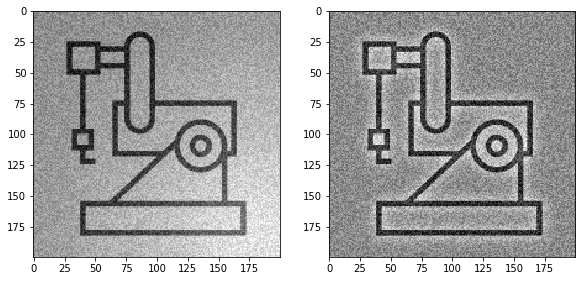

In [20]:
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(imbyc, sigma=5)
fig = plt.figure(figsize=(15,10))
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-gflt),cmap='gray')



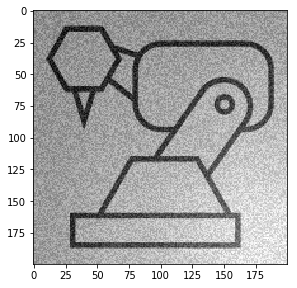

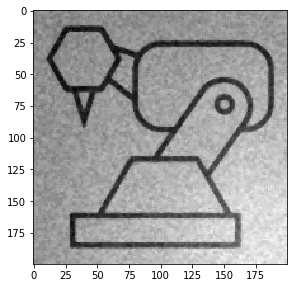

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imlen = img.imread('./1003-Copy1.png')
from scipy import ndimage
import scipy.misc
import numpy as np
from scipy import ndimage as nimg
import numpy as np
im2 =nimg.median_filter(imlen, size=3, footprint=None, output =None, 
                         mode='reflect', cval=0.0, origin = 0)
#im2  =scipy.misc.toimage(gflt)
#im2.save('median_output.png')
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(imlen,cmap='gray')
fig2 = plt.figure(figsize=(10,10))
plt.subplot(122)
plt.imshow(im2,cmap='gray')


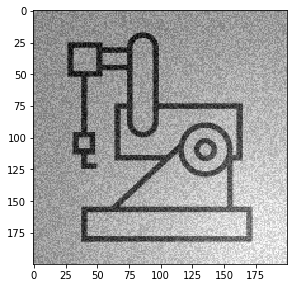

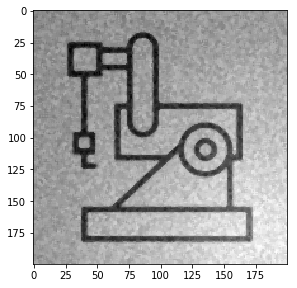

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imlen = img.imread('./1000-Copy1.png')
from scipy import ndimage
import scipy.misc
import numpy as np
from scipy import ndimage as nimg
import numpy as np
im2 =nimg.median_filter(imlen, size=3, footprint=None, output =None, 
                         mode='reflect', cval=0.0, origin = 0)
#im2  =scipy.misc.toimage(gflt)
#im2.save('median_output.png')
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(imlen,cmap='gray')
fig2 = plt.figure(figsize=(10,10))
plt.subplot(122)
plt.imshow(im2,cmap='gray')

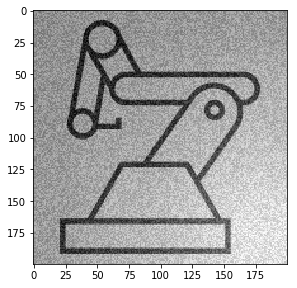

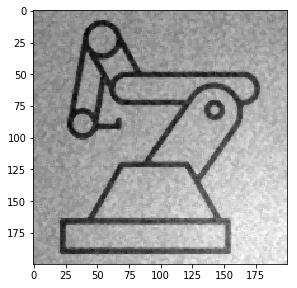

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imlen = img.imread('./1002-Copy1.png')
from scipy import ndimage
import scipy.misc
import numpy as np
from scipy import ndimage as nimg
import numpy as np
im2 =nimg.median_filter(imlen, size=3, footprint=None, output =None, 
                         mode='reflect', cval=0.0, origin = 0)
#im2  =scipy.misc.toimage(gflt)
#im2.save('median_output.png')
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(imlen,cmap='gray')
fig2 = plt.figure(figsize=(10,10))
plt.subplot(122)
plt.imshow(im2,cmap='gray')

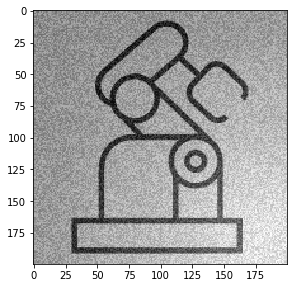

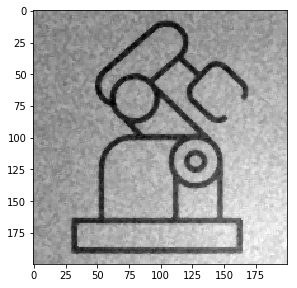

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imlen = img.imread('./1004-Copy1.png')
from scipy import ndimage
import scipy.misc
import numpy as np
from scipy import ndimage as nimg
import numpy as np
im2 =nimg.median_filter(imlen, size=3, footprint=None, output =None, 
                         mode='reflect', cval=0.0, origin = 0)
#im2  =scipy.misc.toimage(gflt)
#im2.save('median_output.png')
fig = plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(imlen,cmap='gray')
fig2 = plt.figure(figsize=(10,10))
plt.subplot(122)
plt.imshow(im2,cmap='gray')

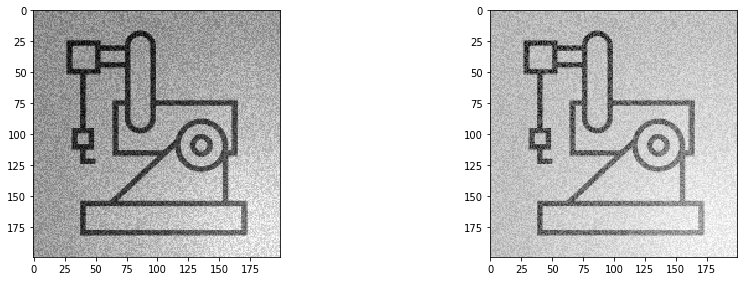

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
#imbook = img.imread('./book.png')
from scipy import ndimage
import scipy.misc
import numpy as np
import math
from scipy import ndimage as nimg
import numpy as np
from scipy.misc.pilutil import Image
a = Image.open('./1000-Copy1.png')
imgout = Image.open('./1000-Copy1.png')
b = scipy.misc.fromimage(a)
b1 = b.astype(float)
b2 = np.max(b1)
c = (255.0*np.log(70+b1))/np.log(b2)
c1 = c.astype(int)
d = scipy.misc.toimage(c1)
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imgout,cmap='gray')
plt.subplot(222)
plt.imshow(d,cmap='gray')

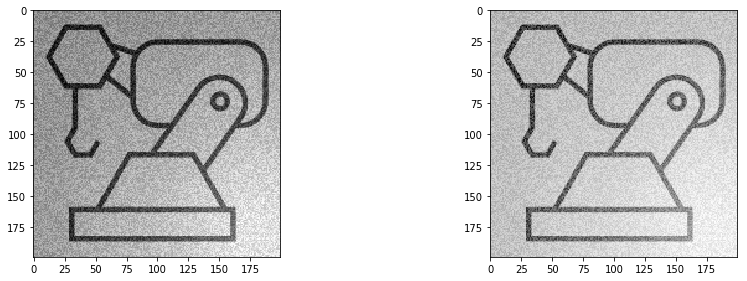

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
#imbook = img.imread('./book.png')
from scipy import ndimage
import scipy.misc
import numpy as np
import math
from scipy import ndimage as nimg
import numpy as np
from scipy.misc.pilutil import Image
a = Image.open('./1001-Copy1.png')
imgout = Image.open('./1001-Copy1.png')
b = scipy.misc.fromimage(a)
b1 = b.astype(float)
b2 = np.max(b1)
c = (255.0*np.log(70+b1))/np.log(b2)
c1 = c.astype(int)
d = scipy.misc.toimage(c1)
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imgout,cmap='gray')
plt.subplot(222)
plt.imshow(d,cmap='gray')

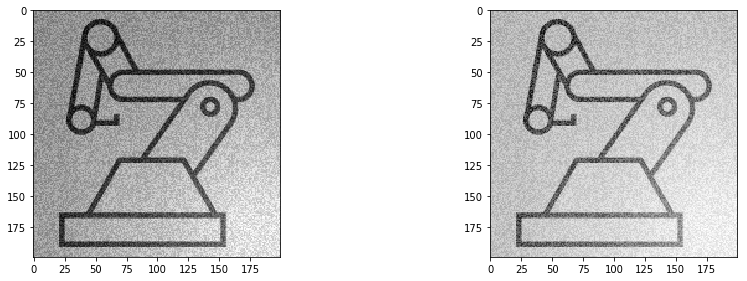

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
#imbook = img.imread('./book.png')
from scipy import ndimage
import scipy.misc
import numpy as np
import math
from scipy import ndimage as nimg
import numpy as np
from scipy.misc.pilutil import Image
a = Image.open('./1002-Copy1.png')
imgout = Image.open('./1002-Copy1.png')
b = scipy.misc.fromimage(a)
b1 = b.astype(float)
b2 = np.max(b1)
c = (255.0*np.log(70+b1))/np.log(b2)
c1 = c.astype(int)
d = scipy.misc.toimage(c1)
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imgout,cmap='gray')
plt.subplot(222)
plt.imshow(d,cmap='gray')

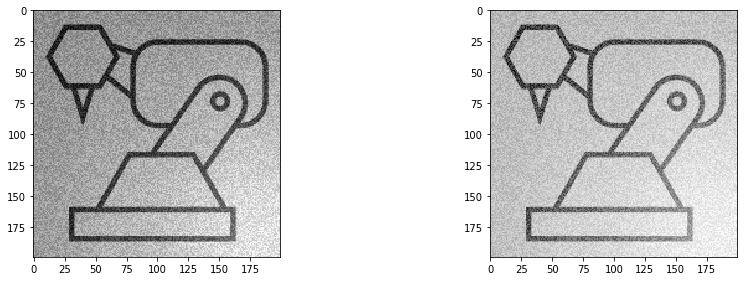

In [31]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
#imbook = img.imread('./book.png')
from scipy import ndimage
import scipy.misc
import numpy as np
import math
from scipy import ndimage as nimg
import numpy as np
from scipy.misc.pilutil import Image
a = Image.open('./1003-Copy1.png')
imgout = Image.open('./1003-Copy1.png')
b = scipy.misc.fromimage(a)
b1 = b.astype(float)
b2 = np.max(b1)
c = (255.0*np.log(70+b1))/np.log(b2)
c1 = c.astype(int)
d = scipy.misc.toimage(c1)
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imgout,cmap='gray')
plt.subplot(222)
plt.imshow(d,cmap='gray')

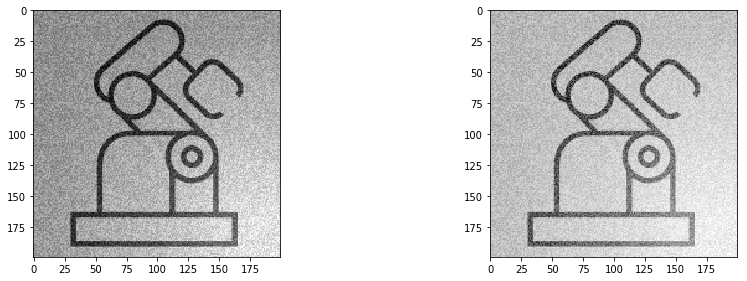

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
#imbook = img.imread('./book.png')
from scipy import ndimage
import scipy.misc
import numpy as np
import math
from scipy import ndimage as nimg
import numpy as np
from scipy.misc.pilutil import Image
a = Image.open('./1004-Copy1.png')
imgout = Image.open('./1004-Copy1.png')
b = scipy.misc.fromimage(a)
b1 = b.astype(float)
b2 = np.max(b1)
c = (255.0*np.log(70+b1))/np.log(b2)
c1 = c.astype(int)
d = scipy.misc.toimage(c1)
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imgout,cmap='gray')
plt.subplot(222)
plt.imshow(d,cmap='gray')

/Users/amina/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


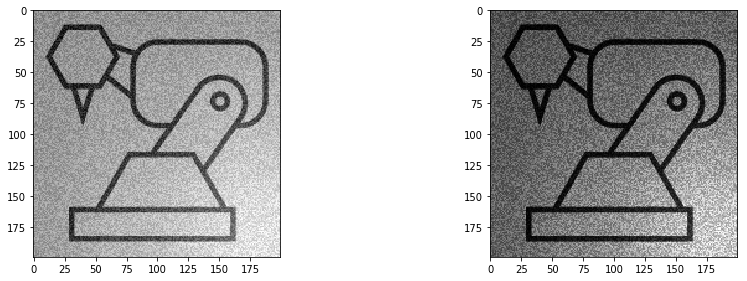

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
from scipy import ndimage
import scipy.misc
import numpy as np
import math
from scipy import ndimage as nimg
import numpy as np
from scipy.misc.pilutil import Image
a = Image.open('./1003-Copy1.png')
img = Image.open('./1003-Copy1.png')
var = scipy.misc.fromimage(a)
gamma = 2
var1 = var.astype(float)
var3 = np.max(var1)
var2 = var1/var3
var3 = np.log(var2)*gamma
c = np.exp(var3)*255.5
c1 = c.astype(int)
d = scipy.misc.toimage(c1)
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(img,cmap='gray')
plt.subplot(222)
plt.imshow(d,cmap='gray')